In [1]:
DIR = './data/sequences/'
import pickle
import numpy as np

with open(DIR + 'dbow/train/regressors1.pkl', 'rb') as fp:
    X_train = pickle.load(fp)
print(len(X_train))
with open(DIR + 'dbow/test/regressors1.pkl', 'rb') as fp:
    X_test = pickle.load(fp)
print(len(X_test))
with open(DIR + 'dbow/train/targets1.pkl', 'rb') as fp:
    y_train = pickle.load(fp)

with open(DIR + 'dbow/test/targets1.pkl', 'rb') as fp:
    y_test = pickle.load(fp)

with open(DIR + 'dm/train/regressors1_dmm.pkl', 'rb') as fp:
    X_train = np.array(X_train) + np.array(pickle.load(fp))
print(len(X_train))
with open(DIR + 'dm/test/regressors1_dmm.pkl', 'rb') as fp:
    X_test = np.array(X_test) + np.array(pickle.load(fp))
print(len(X_test))
# with open(DIR + 'vec_train/targets1.pkl', 'rb') as fp:
#     y_train = y_train + pickle.load(fp)

# with open(DIR + 'vec_test/targets1.pkl', 'rb') as fp:
#     y_test = y_test + pickle.load(fp)
pivot = len(X_train)

28872
43338
28872
43338


In [2]:
import pandas as pd
y = y_test
fams = {}
for i in y:
    if i.endswith('\n'):
        fam = i[:-1]
    else:
        fam = i
    if fam not in fams.keys():
        fams[fam] = 1
    else:
        fams[fam] += 1
print(fams)

d = dict(zip([i for i in range(36)], fams.keys()))
d

{'chaperonin (HSP60) family': 668, 'thiolase-like superfamily': 651, 'radical SAM superfamily': 1435, 'metallo-dependent hydrolases superfamily': 1080, 'HisA/HisF family': 756, 'protein kinase superfamily': 2534, 'class-I aminoacyl-tRNA synthetase family': 3381, 'class-II aminoacyl-tRNA synthetase family': 4373, 'class I-like SAM-binding methyltransferase superfamily': 2682, 'methylthiotransferase family': 627, 'cytochrome b family': 1077, 'methyltransferase superfamily': 2538, 'TRAFAC class translation factor GTPase superfamily': 2492, 'G-protein coupled receptor 1 family': 1169, 'universal ribosomal protein uL16 family': 639, 'transferase hexapeptide repeat family': 627, 'MurCDEF family': 697, 'ABC transporter superfamily': 2077, 'TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily': 1371, 'universal ribosomal protein uL2 family': 632, 'DEAD box helicase family': 803, 'globin family': 647, 'universal ribosomal protein uS12 family': 615, 'universal ribosomal protein uS8 fam

{0: 'chaperonin (HSP60) family',
 1: 'thiolase-like superfamily',
 2: 'radical SAM superfamily',
 3: 'metallo-dependent hydrolases superfamily',
 4: 'HisA/HisF family',
 5: 'protein kinase superfamily',
 6: 'class-I aminoacyl-tRNA synthetase family',
 7: 'class-II aminoacyl-tRNA synthetase family',
 8: 'class I-like SAM-binding methyltransferase superfamily',
 9: 'methylthiotransferase family',
 10: 'cytochrome b family',
 11: 'methyltransferase superfamily',
 12: 'TRAFAC class translation factor GTPase superfamily',
 13: 'G-protein coupled receptor 1 family',
 14: 'universal ribosomal protein uL16 family',
 15: 'transferase hexapeptide repeat family',
 16: 'MurCDEF family',
 17: 'ABC transporter superfamily',
 18: 'TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily',
 19: 'universal ribosomal protein uL2 family',
 20: 'DEAD box helicase family',
 21: 'globin family',
 22: 'universal ribosomal protein uS12 family',
 23: 'universal ribosomal protein uS8 family',
 24: 'univer

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
from tqdm import tqdm_notebook
X = list(X_train) + list(X_test)
y = y_train + y_test
X = scaler.fit_transform(X)
X_train = X[:pivot]
X_test = X[pivot:]
y_train = y[:pivot]
y_test = y[pivot:]

In [4]:
# X_test = X_test[:int(len(y_test)/2)]
# y_test = y_test[:int(len(y_test)/2)]
print(len(X_train),len(y_train), len(X_test), len(y_test))

28872 28872 43338 43338


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0).fit(X_train, y_train)
# print(clf1.score(X_train, y_train), clf1.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [6]:
with open('./data/document_embedding_based_models/extra_trees_c.pkl', 'wb') as fp:
    pickle.dump(clf1, fp)

In [7]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB().fit(X_train, y_train)
# print(clf2.score(X_train, y_train), clf2.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [8]:
with open('./data/document_embedding_based_models/GaussianNB_c.pkl', 'wb') as fp:
    pickle.dump(clf2, fp)

In [9]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(random_state=0, max_iter=40000).fit(X_train, y_train)
# print(clf3.score(X_train, y_train), clf3.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [10]:
with open('./data/document_embedding_based_models/logreg_c.pkl', 'wb') as fp:
    pickle.dump(clf3, fp)

In [15]:
from sklearn.svm import SVC
clf5 = SVC(kernel='linear').fit(X_train, y_train)
# print(clf4.score(X_train, y_train), clf4.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [16]:
with open('./data/document_embedding_based_models/svm_c.pkl', 'wb') as fp:
    pickle.dump(clf5, fp)

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf6 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0).fit(X_train, y_train)
# print(clf5.score(X_train, y_train), clf5.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [18]:
with open('./data/document_embedding_based_models/random_forest_c.pkl', 'wb') as fp:
    pickle.dump(clf6, fp)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf7 = KNeighborsClassifier(n_neighbors= 7, weights='distance', algorithm='auto', metric='euclidean', n_jobs=-1).fit(X_train, y_train)
# print(clf6.score(X_train, y_train), clf6.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [20]:
with open('./data/document_embedding_based_models/models/knn_c.pkl', 'wb') as fp:
    pickle.dump(clf7, fp)

In [21]:
from sklearn.svm import SVC
clf8 = SVC(kernel='rbf').fit(X_train, y_train)
# print(clf7.score(X_train, y_train), clf7.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [22]:
with open('./data/document_embedding_based_models/svm_rbf_c.pkl', 'wb') as fp:
    pickle.dump(clf8, fp)

In [ ]:
print('HEHE END !!')

In [ ]:
len(list(set(y_train)))

In [ ]:
fams = []
for i in y_train:
    if i.endswith('\n'):
        fams.append(i[:-1])
    else:
        fams.append(i)
set(fams)

In [ ]:
len(list(set(fams)))

In [ ]:
X = list(X_train) + list(X_test)
y = list(y_train) + list(y_test)

In [ ]:
classifiers = {
    'clf1' : clf1,
    'clf2' : clf2,
    'clf3' : clf3,
    'clf4' : clf4,
    'clf5' : clf5,
    'clf6' : clf6,
    'clf7' : clf7,
}
for i in range(1, 8):
    print(i, classifiers['clf'+str(i)].score(X, y))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

temp_y = []
for i in y_train:
    if i.endswith('\n'):
        temp_y.append(i[:-1])
    else:
        temp_y.append(i)
y_train = temp_y


temp_y = []
for i in y_test:
    if i.endswith('\n'):
        temp_y.append(i[:-1])
    else:
        temp_y.append(i)
y_test = temp_y
y = y_train + y_test

len(list(set(y_train)))


temp = list(set(y))
d = dict(zip(temp, [i for i in range(len(temp))]))
temp_y = []
for i in y:
    temp_y.append(d[i])
y = temp_y
y[0]
y_true = y

for i in range(1, 8):
    y_preds = classifiers['clf'+str(i)].predict(X)
    temp = []
    for j in y_preds:
        if j.endswith('\n'):
            temp.append(j[:-1])
        else:
            temp.append(j)
    y_preds = [d[j] for j in temp]
    cm = confusion_matrix(y_true, y_preds)
    print(i)
    plt.figure(figsize=(40, 40))
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix', size = 36)
    plt.colorbar()
    tick_marks = np.arange(36)
    plt.xticks(tick_marks, [i for i in list(set(y_true))], rotation=90, size = 15)
    plt.yticks(tick_marks, [i for i in list(set(y_true))], size = 15)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 36)
    plt.xlabel('Predicted label', size = 36)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(y_train[0])
temp_y = []
for i in y_train:
    if i.endswith('\n'):
        temp_y.append(i[:-1])
    else:
        temp_y.append(i)
y_train = temp_y


temp_y = []
for i in y_test:
    if i.endswith('\n'):
        temp_y.append(i[:-1])
    else:
        temp_y.append(i)
y_test = temp_y
y = y_train + y_test




temp = list(set(y))
with open ('./data/document_embedding_based_models/label2idx.pkl', 'rb') as pkl:
    d = pickle.load(pkl)
temp_y = []
for i in y:
    temp_y.append(d[i])
y = temp_y
y_train = [d[i] for i in y_train]
y_test = [d[i] for i in y_test]
y[0]
y_true = y
print(y_train[0])
len(list(set(y_train)))

chaperonin (HSP60) family
32


36

In [6]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [7]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=44)
len(list(set(list(y_test))))

36

In [8]:
y_train = label_binarize(np.array(y_train), classes=list(set(y_train)))
y_test = label_binarize(np.array(y_test), classes=list(set(y_test)))

In [9]:
n_classes = y_train.shape[1]
n_samples, n_features = X.shape
import os
def plot_roc(clf, file, linestyle):
    classifier = OneVsRestClassifier(clf)
    if os.path.exists('./data/document_embedding_based_models/' + file + '.pkl'):
        with open ('./data/document_embedding_based_models/' + file + '.pkl', 'rb') as pkl:
            model = pickle.load(pkl)
    else:
        model = classifier.fit(X_train, y_train)
        with open ('./data/document_embedding_based_models/' + file + '.pkl', 'wb') as pkl:
            pickle.dump(model, pkl)
    if file.endswith('linear') or file.endswith('rbf'):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw = 2

    
    print(file)
#     print(model.score(X_train, y_train), model.score(X_test, y_test), model.score(X, y))
    plt.rcParams["figure.figsize"] = (8,5)
    plt.rcParams['xtick.labelsize']= 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.plot(fpr[2], tpr[2],
             lw=lw, label=file + ' (area = %0.2f)' % roc_auc[2], color='black', linestyle=linestyle)
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.title('Receiver operating characteristic Plot on DBOW+DM Data', size=16)
    plt.legend(loc="lower right", fontsize=8)

In [10]:
from collections import OrderedDict

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

DBOW+DM Extra Trees Classifier
DBOW+DM Gaussian Naive Bayes
DBOW+DM Logistic Regression
DBOW+DM Random Forest Classifier
DBOW+DM K-Nearest Neighbor
DBOW+DM SVM kernel=linear
DBOW+DM SVM kernel=rbf


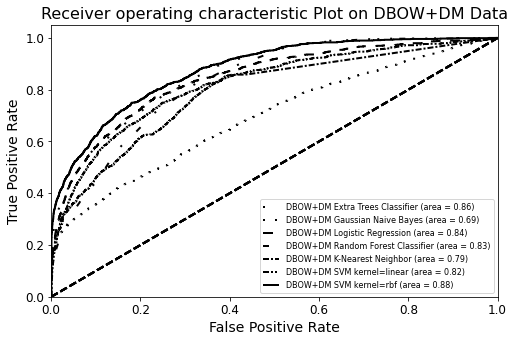

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


plot_roc(ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0), 'DBOW+DM Extra Trees Classifier', linestyles['loosely dotted'])
plot_roc(GaussianNB(), 'DBOW+DM Gaussian Naive Bayes', linestyles['dotted'])
plot_roc(LogisticRegression(random_state=0, max_iter=40000), 'DBOW+DM Logistic Regression', linestyles['dashed'])
plot_roc(RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0), 'DBOW+DM Random Forest Classifier', linestyles['loosely dashdotted'])
plot_roc(KNeighborsClassifier(n_neighbors= 7, weights='distance', algorithm='auto', metric='euclidean', n_jobs=-1), 'DBOW+DM K-Nearest Neighbor', linestyles['densely dashdotted'])
plot_roc(SVC(kernel='linear'), 'DBOW+DM SVM kernel=linear', linestyles['densely dashdotdotted'])
plot_roc(SVC(kernel='rbf'), 'DBOW+DM SVM kernel=rbf', linestyles['solid'])
plt.savefig('Z:/Projects/Protein Family Prediction using Document Embedding (SUCCESS)/Paper Submission/latest/dbow_dm_roc.tif', dpi=600)

DBOW+DM Gaussian Naive Bayes
Average precision score, micro-averaged over all classes: 0.56


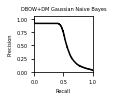

DBOW+DM Extra Trees Classifier
Average precision score, micro-averaged over all classes: 0.75


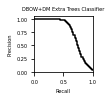

DBOW+DM Logistic Regression
Average precision score, micro-averaged over all classes: 0.74


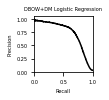

DBOW+DM Random Forest Classifier
Average precision score, micro-averaged over all classes: 0.67


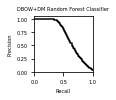

DBOW+DM K-Nearest Neighbor
Average precision score, micro-averaged over all classes: 0.57


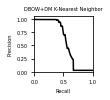

DBOW+DM SVM kernel=linear
Average precision score, micro-averaged over all classes: 0.57


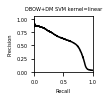

DBOW+DM SVM kernel=rbf
Average precision score, micro-averaged over all classes: 0.82


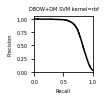

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, recall_score
files = ['DBOW+DM Gaussian Naive Bayes', 'DBOW+DM Extra Trees Classifier', 'DBOW+DM Logistic Regression', 'DBOW+DM Random Forest Classifier', 'DBOW+DM K-Nearest Neighbor', 'DBOW+DM SVM kernel=linear', 'DBOW+DM SVM kernel=rbf']
for file in files:
    print(file)
    with open ('./data/document_embedding_based_models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    if file.endswith('linear') or file.endswith('rbf'):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)
    # For each class
    precision = dict()
    recall = dict()
    thresh = dict()
    f1 = dict()
    average_precision = dict()
    average_recall = dict()
    average_f1_score = dict()
    for i in range(n_classes):
        precision[i], recall[i], thresh[i] = precision_recall_curve(y_test[:, i],
                                                            y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], thresh['micro'] = precision_recall_curve(y_test.ravel(),
        y_score.ravel())
    
#     f1['micro'] = 2 * (precision['micro']*recall['micro']) / (precision['micro']+recall['micro'])
    
    average_precision["micro"] = average_precision_score(y_test, y_score,
                                                         average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))
    
    
    plt.rcParams["figure.figsize"] = (1.5,1.5)    
    plt.rcParams['xtick.labelsize']=5
    plt.rcParams['ytick.labelsize']=5
    plt.step(recall['micro'], precision['micro'], where='post', color='black')
    plt.xlabel('Recall', size=5)
    plt.ylabel('Precision', size=5)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title( file, size=5)
    plt.tight_layout()
    plt.savefig('./data/document_embedding_based_models/'+file+'.tif', dpi=600)
    plt.show()
    
#     plt.figure()
#     plt.step(thresh['micro'], f1['micro'][:-1], where='post')
#     plt.xlabel('F1 Score')
#     plt.ylabel('Threshold')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('F1-Score, micro-averaged over all classes vs Threshold')
#     plt.show()
#     print(file + ' Threshold = ', thresh['micro'][np.argmax(f1['micro'][:-1])])
#     break

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook
import pickle
with open ('./data/document_embedding_based_models/label2idx.pkl', 'rb') as pkl:
    d = pickle.load(pkl)
idx2label = dict(zip(d.values(), d.keys()))

files = ['DBOW+DM SVM kernel=linear', 'DBOW+DM Gaussian Naive Bayes', 'DBOW+DM Extra Trees Classifier', 'DBOW+DM Logistic Regression', 'DBOW+DM Random Forest Classifier', 'DBOW+DM K-Nearest Neighbor', 'DBOW+DM SVM kernel=rbf']
thresholds = [0.1511, 0.1842, 0.14, 0.64479, 0.14, 0.4336, 0.5]
# files = ['DBOW Logistic Regression']
for file, thresh in tqdm_notebook(zip(files, thresholds)):
    with open ('./data/document_embedding_based_models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    y_pred = model.predict(X_test)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    testing_acc = accuracy_score(y_pred, y_test)
    
    y_pred = model.predict(X_train)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    training_acc = accuracy_score(y_pred, y_train)
    
    y_pred = model.predict(X)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    avg_acc = accuracy_score(y_pred, y)
    print('One-vs-All', file, training_acc, testing_acc, avg_acc)

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


One-vs-All DBOW+DM SVM kernel=linear 0.9999307287337212 0.5963127047856385 0.7576928403268245
One-vs-All DBOW+DM Gaussian Naive Bayes 0.8431352175117761 0.4609119017951913 0.6137377094585238
One-vs-All DBOW+DM Extra Trees Classifier 1.0 0.3552309751257557 0.6130314360891843
One-vs-All DBOW+DM Logistic Regression 0.9989955666389582 0.6620517790391804 0.7967733000969395
One-vs-All DBOW+DM Random Forest Classifier 0.9999307287337212 0.3821588444321381 0.6291649356044869


In [23]:
from sklearn.metrics import normalized_mutual_info_score, classification_report
import numpy as np
x = 'extra_trees_c GaussianNB_c logreg_c svm_c random_forest_c knn_c svm_rbf_c'
files = x.split(' ')
for file in tqdm_notebook(files):
    with open ('./data/document_embedding_based_models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    print(file)
    
#     y_preds = [np.argmax(i) for i in model.predict(X_train)]
#     nmi = normalized_mutual_info_score(y_train, y_preds,average_method='arithmetic')
#     print('Training NMI - ', nmi)
    
    y_preds = model.predict(X_test)
    nmi = normalized_mutual_info_score(y_test, y_preds,average_method='arithmetic')
    report = classification_report(y_test, y_preds)
    print(model.score(X_test, y_test))
    print('Testing NMI - ', nmi)
    print(report)
    
#     y_preds = [np.argmax(i) for i in model.predict(X)]
#     nmi = normalized_mutual_info_score(y, y_preds,average_method='arithmetic')
#     print('Average NMI - ', nmi)
    print('\n')

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


extra_trees_c


C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6739120402418202
Testing NMI -  0.47798798334814036
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       0.98      0.81      0.89       756
                                                MurCDEF family       0.00      0.00      0.00         0
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
         

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7463196271170797
Testing NMI -  0.5755062835647319
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.64      0.78       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
          

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7510729613733905
Testing NMI -  0.5890040795583058
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.73      0.85       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
                                     chaperonin (HSP60) family       1.00      0.91      0.95       668
        cl

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.663205500946052
Testing NMI -  0.5101368048319571
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.81      0.89       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
                                     chaperonin (HSP60) family       0.97      0.93      0.95       668
        cla

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6715122986755272
Testing NMI -  0.4850134921529872
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       0.97      0.79      0.87       756
                                                MurCDEF family       0.00      0.00      0.00         0
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5212515575245743
Testing NMI -  0.3837131876043072
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.51      0.67       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
          

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7013244727490886
Testing NMI -  0.5903502370564406
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.55      0.71       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
                                     chaperonin (HSP60) family       1.00      0.71      0.83       668
        cl

In [24]:
from sklearn.metrics import normalized_mutual_info_score, classification_report
import numpy as np
x = 'extra_trees GaussianNB logreg svm random_forest knn svm_rbf'
files = x.split(' ')
for file in tqdm_notebook(files):
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    print(file)
    print(model.score(X_train, y_train))
    print(model.score(X, y))
    
    y_preds = model.predict(X_train)
    nmi = normalized_mutual_info_score(y_train, y_preds,average_method='arithmetic')
    print('Training NMI - ', nmi)
    
    y_preds = model.predict(X)
    nmi = normalized_mutual_info_score(y, y_preds,average_method='arithmetic')
    print('Average NMI - ', nmi)
    print('\n')

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


extra_trees
0.942643391521197
0.7625259659326963
Training NMI -  0.9040384289111079
Average NMI -  0.6713488251784204


GaussianNB
0.9511291216403436
0.782190832294696
Training NMI -  0.9176628709866882
Average NMI -  0.700673831375685


logreg
0.9788376281518426
0.8297327239994461
Training NMI -  0.9642600312982699
Average NMI -  0.7366397958210276


svm
0.9850374064837906
0.8274061764298574
Training NMI -  0.9727581043116582
Average NMI -  0.7398136309611586


random_forest
0.9323219728456636
0.7634122697687301
Training NMI -  0.8897970402250672
Average NMI -  0.6697798799208069


knn
0.9850374064837906
0.8274061764298574
Training NMI -  0.9727581043116582
Average NMI -  0.7398136309611586


svm_rbf
0.9913757273482959
0.8181969256335687
Training NMI -  0.982247454094883
Average NMI -  0.7481703741076979



